In [ ]:
!pip install pyspark
# Importing necessary libraries
from pyspark.sql import SparkSession

# Creating a SparkSession
spark = SparkSession.builder.appName("BigDataAnalytics").getOrCreate()

# Reading the dataset
data = spark.read.csv("/content/NYC.csv", header=True, inferSchema=True)

# Displaying the dataset schema
data.printSchema()

root
 |-- id: string (nullable = true)
 |-- vendor_id: integer (nullable = true)
 |-- pickup_datetime: string (nullable = true)
 |-- dropoff_datetime: string (nullable = true)
 |-- passenger_count: string (nullable = true)
 |-- pickup_longitude: double (nullable = true)
 |-- pickup_latitude: double (nullable = true)
 |-- dropoff_longitude: double (nullable = true)
 |-- dropoff_latitude: string (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- trip_duration: integer (nullable = true)



In [ ]:
# Counting the number of records in the dataset
record_count = data.count()
print("Number of records:", record_count)

Number of records: 60997


In [ ]:
# Summary statistics of the trip duration
data.describe("trip_duration").show()

+-------+-----------------+
|summary|    trip_duration|
+-------+-----------------+
|  count|            60995|
|   mean|948.0460857447332|
| stddev|3141.785290814647|
|    min|                1|
|    max|            86357|
+-------+-----------------+



In [ ]:
# Dropping irrelevant columns
data = data.drop("id", "vendor_id",  "dropoff_datetime", "store_and_fwd_flag")

In [ ]:
# Handling missing values
data = data.dropna()

In [ ]:
# Checking for duplicates
duplicate_count = data.count() - data.dropDuplicates().count()
print("Number of duplicates:", duplicate_count)

Number of duplicates: 0


In [ ]:
data.printSchema()

root
 |-- pickup_datetime: string (nullable = true)
 |-- passenger_count: string (nullable = true)
 |-- pickup_longitude: double (nullable = true)
 |-- pickup_latitude: double (nullable = true)
 |-- dropoff_longitude: double (nullable = true)
 |-- dropoff_latitude: string (nullable = true)
 |-- trip_duration: integer (nullable = true)



In [ ]:
# Importing necessary libraries
from pyspark.sql.functions import col, hour, dayofweek

In [ ]:
# Adding new features
data = data.withColumn("pickup_hour", hour(col("pickup_datetime")))
data = data.withColumn("pickup_dayofweek", dayofweek(col("pickup_datetime")))

In [ ]:
# Aggregating and summarizing data
avg_duration_by_hour = data.groupBy("pickup_hour").avg("trip_duration").orderBy("pickup_hour")
avg_duration_by_day = data.groupBy("pickup_dayofweek").avg("trip_duration").orderBy("pickup_dayofweek")

In [ ]:
# Displaying the results
avg_duration_by_hour.show()
avg_duration_by_day.show()

+-----------+------------------+
|pickup_hour|avg(trip_duration)|
+-----------+------------------+
|          0|  961.259410430839|
|          1| 918.1218405703175|
|          2| 700.9796819787986|
|          3| 826.9276169265033|
|          4|1210.3047091412743|
|          5| 704.2127659574468|
|          6| 705.6065109695683|
|          7| 730.9138370118845|
|          8| 998.6966877558616|
|          9| 837.9705263157895|
|         10| 964.1688825008983|
|         11|1008.8194684156024|
|         12| 945.6070959264126|
|         13| 952.4958563535912|
|         14| 1021.975884244373|
|         15|1187.8109616015754|
|         16| 1053.153038259565|
|         17|1072.8379037172456|
|         18| 1032.036014721346|
|         19| 863.9386631716907|
+-----------+------------------+
only showing top 20 rows

+----------------+------------------+
|pickup_dayofweek|avg(trip_duration)|
+----------------+------------------+
|               1| 856.7180080360404|
|               2| 870.5447583

In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt

In [ ]:
# Converting DataFrame to Pandas DataFrame for visualization
pandas_data = data.toPandas()

In [ ]:
pandas_data.head()

,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_hour,pickup_dayofweek
0,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602111816406,455,17,2
1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731151580810547,663,0,1
2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710086822509766,2124,11,3
3,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718444824219,429,19,4
4,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520294189453,435,13,7


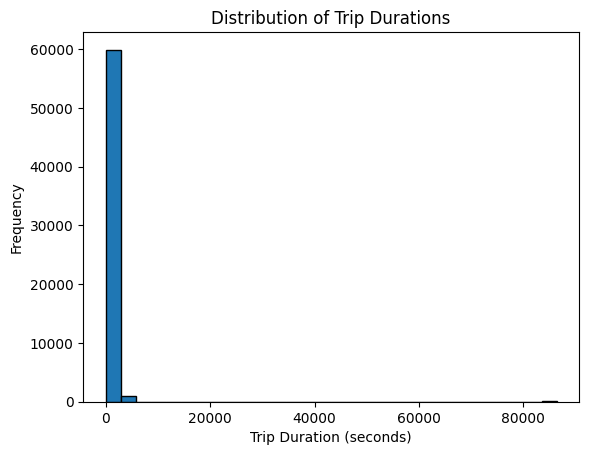

In [ ]:
# Plotting trip duration distribution
plt.hist(pandas_data["trip_duration"], bins=30, edgecolor="black")
plt.xlabel("Trip Duration (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Durations")
plt.show()

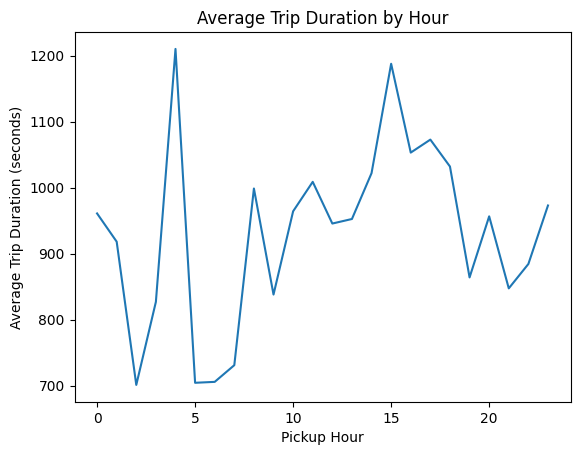

In [ ]:
# Plotting average trip duration by hour
plt.plot(avg_duration_by_hour.toPandas()["pickup_hour"], avg_duration_by_hour.toPandas()["avg(trip_duration)"])
plt.xlabel("Pickup Hour")
plt.ylabel("Average Trip Duration (seconds)")
plt.title("Average Trip Duration by Hour")
plt.show()